<a href="https://colab.research.google.com/github/fernando12170209/Machine_learning_basico/blob/master/Regresion_Lineal/Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving dataset.csv to dataset.csv
    Age  Systolic blood pressure
0    39                      144
1    45                      138
2    47                      145
3    65                      162
4    46                      142
5    67                      170
6    42                      124
7    67                      158
8    56                      154
9    64                      162
10   56                      150
11   59                      140
12   34                      110
13   42                      128
14   48                      130
15   45                      135
16   17                      114
17   20                      116
18   19                      124
19   36                      136
20   50                      142
21   39                      120
22   21                      120
23   44                      160
24   53                      158
25   63                      144
26   29                      130
27   25                      125
28   69  

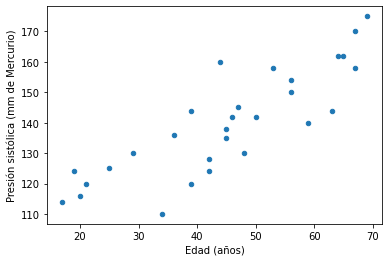

Epoch 1000
    w: 2.7  b: 7.7
    error: [909.68047113]
Epoch 2000
    w: 2.6  b: 14.8
    error: [784.20129437]
Epoch 3000
    w: 2.5  b: 21.3
    error: [677.81786006]
Epoch 4000
    w: 2.3  b: 27.3
    error: [587.62412923]
Epoch 5000
    w: 2.2  b: 32.8
    error: [511.15631133]
Epoch 6000
    w: 2.1  b: 37.9
    error: [446.32556178]
Epoch 7000
    w: 2.0  b: 42.6
    error: [391.36092172]
Epoch 8000
    w: 1.9  b: 46.9
    error: [344.76094135]
Epoch 9000
    w: 1.9  b: 50.9
    error: [305.25266532]
Epoch 10000
    w: 1.8  b: 54.6
    error: [271.75685992]
Epoch 11000
    w: 1.7  b: 57.9
    error: [243.35853196]
Epoch 12000
    w: 1.7  b: 61.0
    error: [219.28193427]
Epoch 13000
    w: 1.6  b: 63.9
    error: [198.86937488]
Epoch 14000
    w: 1.6  b: 66.5
    error: [181.56325105]
Epoch 15000
    w: 1.5  b: 68.9
    error: [166.89081746]
Epoch 16000
    w: 1.5  b: 71.2
    error: [154.4512724]
Epoch 17000
    w: 1.4  b: 73.2
    error: [143.90480915]
Epoch 18000
    w: 1.4  b

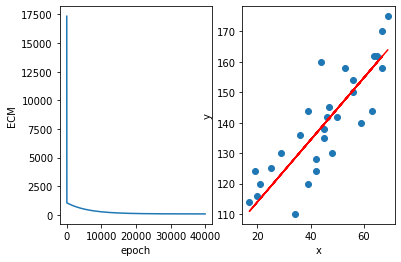

A los 90  años se tendrá una presión sanguínea de 185.3


In [3]:
# Regresión lineal usando el dataset de presión sanguínea vs. edad.
# Tomado de: http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html
# 
# codificandobits.com - 2018


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#
# Funciones para el cálculo del gradiente descendente
# 

def calcular_modelo(w,b,x):
    '''Retorna el valor w*x+b correspondiente al modelo lineal'''
    return w*x+b

def calcular_error(y,y_):
    '''Calcula el error cuadrático medio entre el dato original (y)
       y el dato generado por el modelo (y_)'''
    N = y.shape[0]
    error = np.sum((y-y_)**2)/N
    return error

def gradiente_descendente(w_, b_, alpha, x, y):
    '''Algoritmo del gradiente descendente para minimizar el error
       cuadrático medio'''
    N = x.shape[0]      # Cantidad de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "w" y "b"
    dw = -(2/N)*np.sum(x*(y-(w_*x+b_)))
    db = -(2/N)*np.sum(y-(w_*x+b_))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    w = w_ - alpha*dw
    b = b_ - alpha*db

    return w, b

#
# Leer los datos en un DataFrame de Pandas

#Para cargar los archivos desde la plataforma, ver archivo en github

from google.colab import files
file = files.upload()
#
datos = pd.read_csv('dataset.csv', sep=",", skiprows=32, usecols=[2,3])
print(datos)

# Al graficar los datos se observa una tendencia lineal
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (años)')
plt.ylabel('Presión sistólica (mm de Mercurio)')
plt.show()

x = datos['Age'].values
y = datos['Systolic blood pressure'].values

#
# Aprender los coeficientes "w" y "b" usando el gradiente descendente
#

# Inicializar "w" y "b" aleatoriamente, definir alpha y número de iteraciones.
# En este caso se debe definir una tasa de aprendizaje muy pequeña (w=0.0004) para
# garantizar la convergencia del algoritmo


np.random.seed(2)           # Para reproducibilidad del entrenamiento
w = np.random.randn(1)[0]
b = np.random.randn(1)[0]

alpha = 0.0004
nits = 40000

# Entrenamiento
error = np.zeros((nits,1))
for i in range(nits):
    # Actualizar valor de los pesos usando el gradiente descendente
    [w, b] = gradiente_descendente(w,b,alpha,x,y)

    # Calcular el valor de la predicción
    y_ = calcular_modelo(w,b,x)

    # Actualizar el valor del error
    error[i] = calcular_error(y,y_)

    # Imprimir resultados cada 1000 epochs
    if (i+1)%1000 == 0:
        print("Epoch {}".format(i+1))
        print("    w: {:.1f}".format(w), " b: {:.1f}".format(b))
        print("    error: {}".format(error[i]))
        print("=======================================")

# Gráfica de ECM vs iteraciones y de la regresión lineal resultante
plt.subplot(1,2,1)
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')

y_regr = calcular_modelo(w,b,x)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Predicción
edad = 90
presion = calcular_modelo(w,b,edad)
print("A los {}".format(edad), " años se tendrá una presión sanguínea de {:.1f}".format(presion))